This Jupyter notebook offers an interactive tutorial on utilizing the PreFab library to anticipate the fabrication outcomes of nanoscale structures, specifically a 200 nm-wide cross structure on a Silicon-On-Insulator (SOI) e-beam process. This tutorial is structured as follows:

1. Preparing a device image for prediction
2. Executing a prediction
3. Analyzing the prediction

To begin, we need to import the necessary libraries:


In [1]:
import matplotlib.pyplot as plt
import prefab as pf

The first step involves preparing a device image for prediction. This requires loading an image of a device as a numpy matrix with binary pixel values: 0 or 1. In this tutorial, we'll use an image of a cross, but feel free to explore with other structures available in the `devices/` directory, or include your own images.

The image scale should ideally be 1 nm/px. If not, ensure you specify the actual length of the device image (in nanometers) when loading the image.


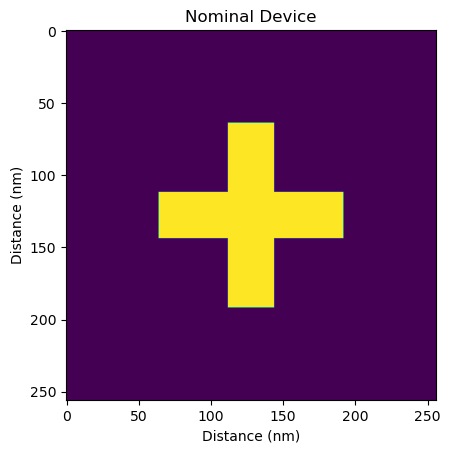

In [2]:
device = pf.load_device_img(path="../devices/cross_32x128_256x256.png")

plt.imshow(device)
plt.title("Nominal Device")
plt.ylabel("Distance (nm)")
plt.xlabel("Distance (nm)")
plt.show()

In the next step, we proceed with the prediction. Each model is labeled by its type ('p' for predictor), fabrication facility and process name, model version, and dataset version. Refer to `docs/models.md` for the list of available models.

You can also choose if you want a binarized output. The predictor, by default, produces raw predictions, which includes "fuzzy" areas of the structure that might vary between different fabrication runs or even different device instances on the same chip. When binarized, the predictor outputs the most probable fabrication outcome. Post-prediction binarization is also an option.


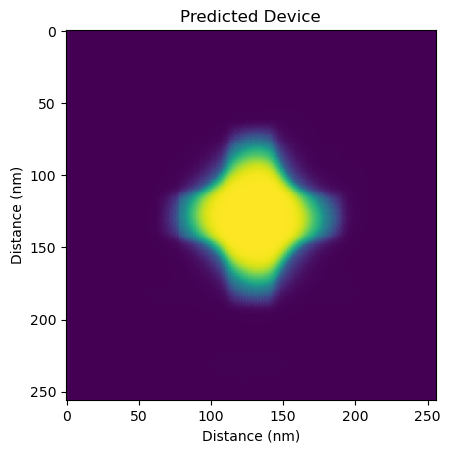

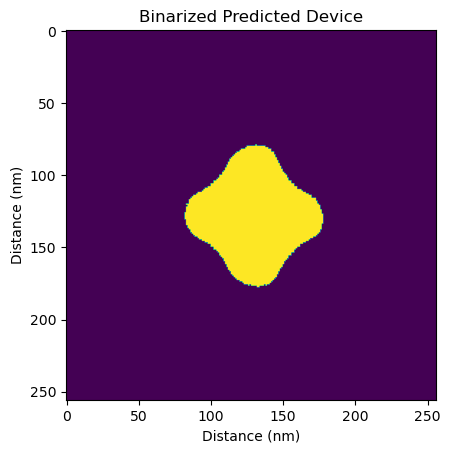

In [3]:
# Note: Initial prediction may take longer due to server startup and model loading. Subsequent predictions should be quicker.
MODEL_NAME = "ANT_NanoSOI"
MODEL_TAGS = "v5-d4"
prediction = pf.predict(device=device, model_name=MODEL_NAME, model_tags=MODEL_TAGS)

plt.imshow(prediction)
plt.title("Predicted Device")
plt.ylabel("Distance (nm)")
plt.xlabel("Distance (nm)")
plt.show()

plt.imshow(pf.binarize(prediction))
plt.title("Binarized Predicted Device")
plt.ylabel("Distance (nm)")
plt.xlabel("Distance (nm)")
plt.show()

Lastly, we analyze the prediction. Plotting the variations between the nominal device and the predicted outcome is an effective analysis technique. It helps in identifying areas of high uncertainty, such as potential rounding of the cross's corners.


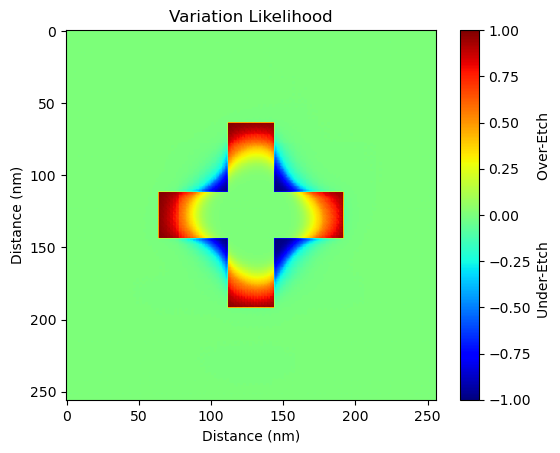

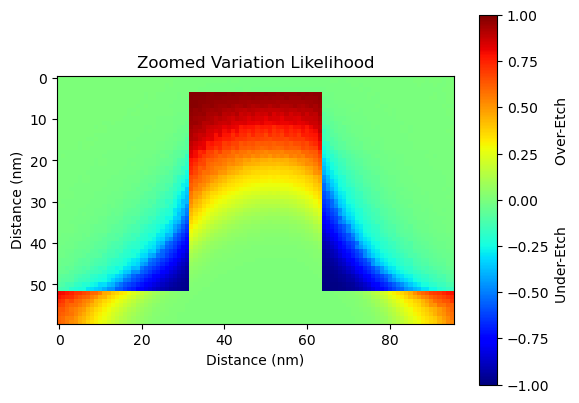

In [4]:
variation = device - prediction
plt.imshow(variation, cmap="jet", vmin=-1, vmax=1)
plt.title("Variation Likelihood")
plt.ylabel("Distance (nm)")
plt.xlabel("Distance (nm)")
cb = plt.colorbar()
cb.set_label("Under-Etch              Over-Etch")
plt.show()

plt.imshow(variation[60:120, 80:-80], cmap="jet", vmin=-1, vmax=1)
plt.title("Zoomed Variation Likelihood")
plt.ylabel("Distance (nm)")
plt.xlabel("Distance (nm)")
cb = plt.colorbar()
cb.set_label("Under-Etch              Over-Etch")
plt.show()

And with that, we conclude this tutorial! You're now ready to use the prediction to simulate expected performance, or even to refine your design to decrease variation and uncertainty (refer to the device correction examples). Happy designing!
